In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

version = '2023-05-16'

sc.settings.figdir = './scanpy/{}/graph'.format(version)
sc.settings.cachedir = './scanpy/{}/cache'.format(version)
%config InlineBackend.figure_format = 'retina'

# matplot 输出的图片为illustrator可编辑的字体
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7


In [5]:
adata_MC = sc.read('./write/MC_leiden.h5ad')
adata_MC.uns['log1p']["base"] = None
adata_MC

AnnData object with n_obs × n_vars = 33577 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spli

categories: B cells, DC2, HSC/MPP, etc.
var_group_labels: B cell, T cell, Monocytes, etc.


c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
meta NOT subset; don't know how to subset; dropped


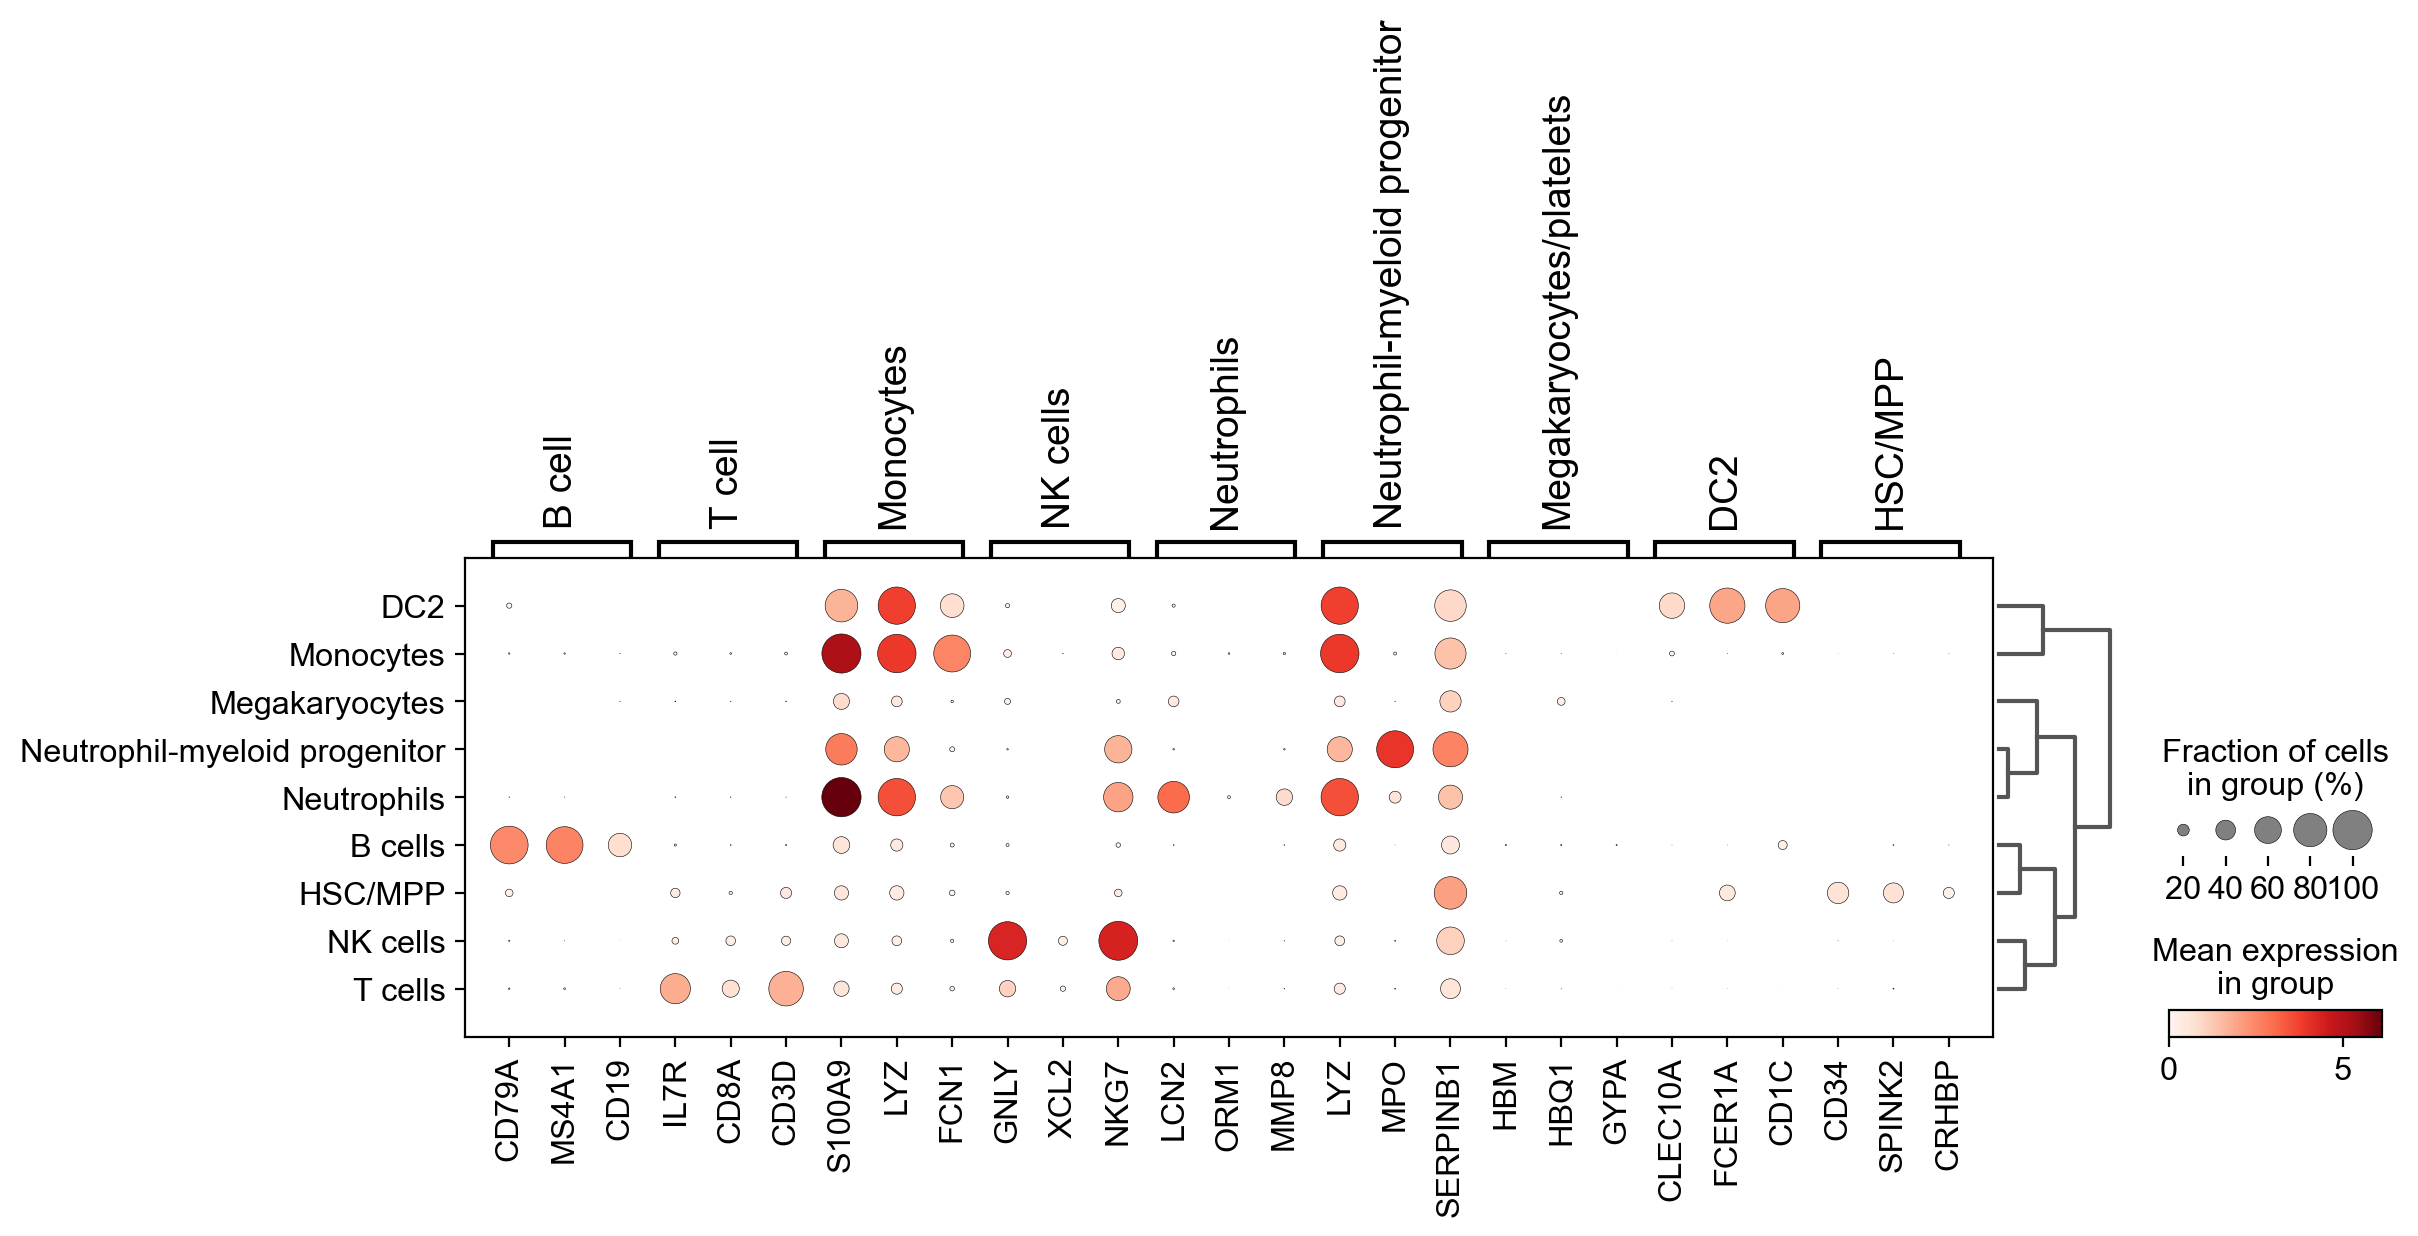

In [5]:
marker_genes_dict = {
    'B cell': ['CD79A', 'MS4A1', 'CD19'],
    'T cell': ['IL7R', 'CD8A', 'CD3D'],
    'Monocytes': ['S100A9', 'LYZ', 'FCN1'],
    'NK cells': ['GNLY', 'XCL2', 'NKG7'],
    'Neutrophils': ['LCN2', 'ORM1', 'MMP8'],
    'Neutrophil-myeloid progenitor': ['LYZ', 'MPO', 'SERPINB1'],
    'Megakaryocytes/platelets': ['HBM', 'HBQ1', 'GYPA'],
    'DC2': ['CLEC10A', 'FCER1A', 'CD1C'],
    'HSC/MPP':['CD34', 'SPINK2', 'CRHBP']
}

sc.pl.dotplot(adata_MC, marker_genes_dict, groupby='Major_cluster', dendrogram=True, save='huan major_cluster marker gene')

# Cell proportion change 

In [24]:
adata_huan.obs["Sample"] = adata_huan.obs["donor_id"].astype(str) +'_' +adata_huan.obs["Phenotype"].astype(str)
adata_huan.obs

,initial_size_spliced,initial_size_unspliced,initial_size,Phenotype,donor_id,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,predicted_labels_NC2022,predicted_labels,over_clustering,majority_voting,leiden,Major_cluster,Sample
AAACCTGAGAATGTGT-0,526,591,526.0,MG_crisis,Patient_1,0,2267,2266,7739.0,58.0,0.749451,Monocyte (CD14),Classical monocytes,115,Classical monocytes,5,Monocytes,Patient_1_MG_crisis
AAACCTGAGCGCCTCA-0,257,624,257.0,MG_crisis,Patient_1,0,2102,2102,6523.0,58.0,0.889161,Monocyte (CD16),Classical monocytes,50,Classical monocytes,0,Monocytes,Patient_1_MG_crisis
AAACCTGAGGCTAGCA-0,268,518,268.0,MG_crisis,Patient_1,0,1953,1953,4736.0,43.0,0.907939,Monocyte (CD14),Classical monocytes,42,Classical monocytes,2,Monocytes,Patient_1_MG_crisis
AAACCTGAGGTAGCCA-0,193,393,193.0,MG_crisis,Patient_1,0,1557,1557,2929.0,80.0,2.731308,NK cell,CD16+ NK cells,35,CD16+ NK cells,3,NK,Patient_1_MG_crisis
AAACCTGAGGTGGGTT-0,488,865,488.0,MG_crisis,Patient_1,0,2766,2766,9678.0,103.0,1.064269,Monocyte (CD14),Classical monocytes,20,Classical monocytes,17,Monocytes,Patient_1_MG_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTGTGCC-5,99,156,99.0,After_crisis,Patient_3,5,806,806,1867.0,19.0,1.017675,CD8 Tnaive,Tcm/Naive helper T cells,102,Tcm/Naive helper T cells,1,T,Patient_3_After_crisis
TTTGTCATCCGTCATC-5,509,555,509.0,After_crisis,Patient_3,5,1864,1864,4259.0,54.0,1.267903,Monocyte (CD14),Classical monocytes,45,Classical monocytes,2,Monocytes,Patient_3_After_crisis
TTTGTCATCCTAGAAC-5,150,223,150.0,After_crisis,Patient_3,5,1145,1145,2408.0,58.0,2.408638,CD8 Tem,Tem/Temra cytotoxic T cells,0,Tem/Temra cytotoxic T cells,3,NK,Patient_3_After_crisis
TTTGTCATCCTCGCAT-5,33,78,33.0,After_crisis,Patient_3,5,404,404,1468.0,4.0,0.272480,Monocyte (CD14),Classical monocytes,172,Classical monocytes,9,Monocytes,Patient_3_After_crisis


In [25]:
num_tot_cells = adata_huan.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.predicted_labels))
num_tot_cells

{'Patient_1_After_crisis': 3843,
 'Patient_1_MG_crisis': 8598,
 'Patient_2_After_crisis': 11849,
 'Patient_2_MG_crisis': 9376,
 'Patient_3_After_crisis': 11580,
 'Patient_3_MG_crisis': 8502}

In [30]:
cell_type_counts = adata_huan.obs.groupby(['Sample', 'Phenotype','Major_cluster']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,Sample,Phenotype,Major_cluster,initial_size_spliced
0,Patient_1_After_crisis,After_crisis,B,218
1,Patient_1_After_crisis,After_crisis,DC2,1
2,Patient_1_After_crisis,After_crisis,Megakaryocytes/platelets,33
3,Patient_1_After_crisis,After_crisis,Monocytes,1153
4,Patient_1_After_crisis,After_crisis,NK,708
5,Patient_1_After_crisis,After_crisis,Neutrophil-myeloid progenitor,166
6,Patient_1_After_crisis,After_crisis,Neutrophils,274
7,Patient_1_After_crisis,After_crisis,T,1290
8,Patient_1_MG_crisis,MG_crisis,B,409
9,Patient_1_MG_crisis,MG_crisis,DC2,20


In [31]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.initial_size_spliced / cell_type_counts.total_cells

cell_type_counts

,Sample,Phenotype,Major_cluster,initial_size_spliced,total_cells,frequency
0,Patient_1_After_crisis,After_crisis,B,218,3843,0.056727
1,Patient_1_After_crisis,After_crisis,DC2,1,3843,0.000260
2,Patient_1_After_crisis,After_crisis,Megakaryocytes/platelets,33,3843,0.008587
3,Patient_1_After_crisis,After_crisis,Monocytes,1153,3843,0.300026
4,Patient_1_After_crisis,After_crisis,NK,708,3843,0.184231
5,Patient_1_After_crisis,After_crisis,Neutrophil-myeloid progenitor,166,3843,0.043195
6,Patient_1_After_crisis,After_crisis,Neutrophils,274,3843,0.071298
7,Patient_1_After_crisis,After_crisis,T,1290,3843,0.335675
8,Patient_1_MG_crisis,MG_crisis,B,409,8598,0.047569
9,Patient_1_MG_crisis,MG_crisis,DC2,20,8598,0.002326


In [83]:
from scipy import stats

# calculate p value 
for celltype in cell_type_counts.Major_cluster.unique().tolist():
    print(celltype)

    res = stats.wilcoxon(
        cell_type_counts[(cell_type_counts.Phenotype == 'MG_crisis') & (cell_type_counts.Major_cluster == celltype)].frequency*100,
        cell_type_counts[(cell_type_counts.Phenotype == 'After_crisis') & (cell_type_counts.Major_cluster == celltype)].frequency*100,
        )
    print(res)

B
WilcoxonResult(statistic=3.0, pvalue=1.0)
DC2
WilcoxonResult(statistic=3.0, pvalue=1.0)
Megakaryocytes/platelets
WilcoxonResult(statistic=3.0, pvalue=1.0)
Monocytes
WilcoxonResult(statistic=0.0, pvalue=0.25)
NK
WilcoxonResult(statistic=0.0, pvalue=0.25)
Neutrophil-myeloid progenitor
WilcoxonResult(statistic=0.0, pvalue=0.25)
Neutrophils
WilcoxonResult(statistic=0.0, pvalue=0.25)
T
WilcoxonResult(statistic=1.0, pvalue=0.5)


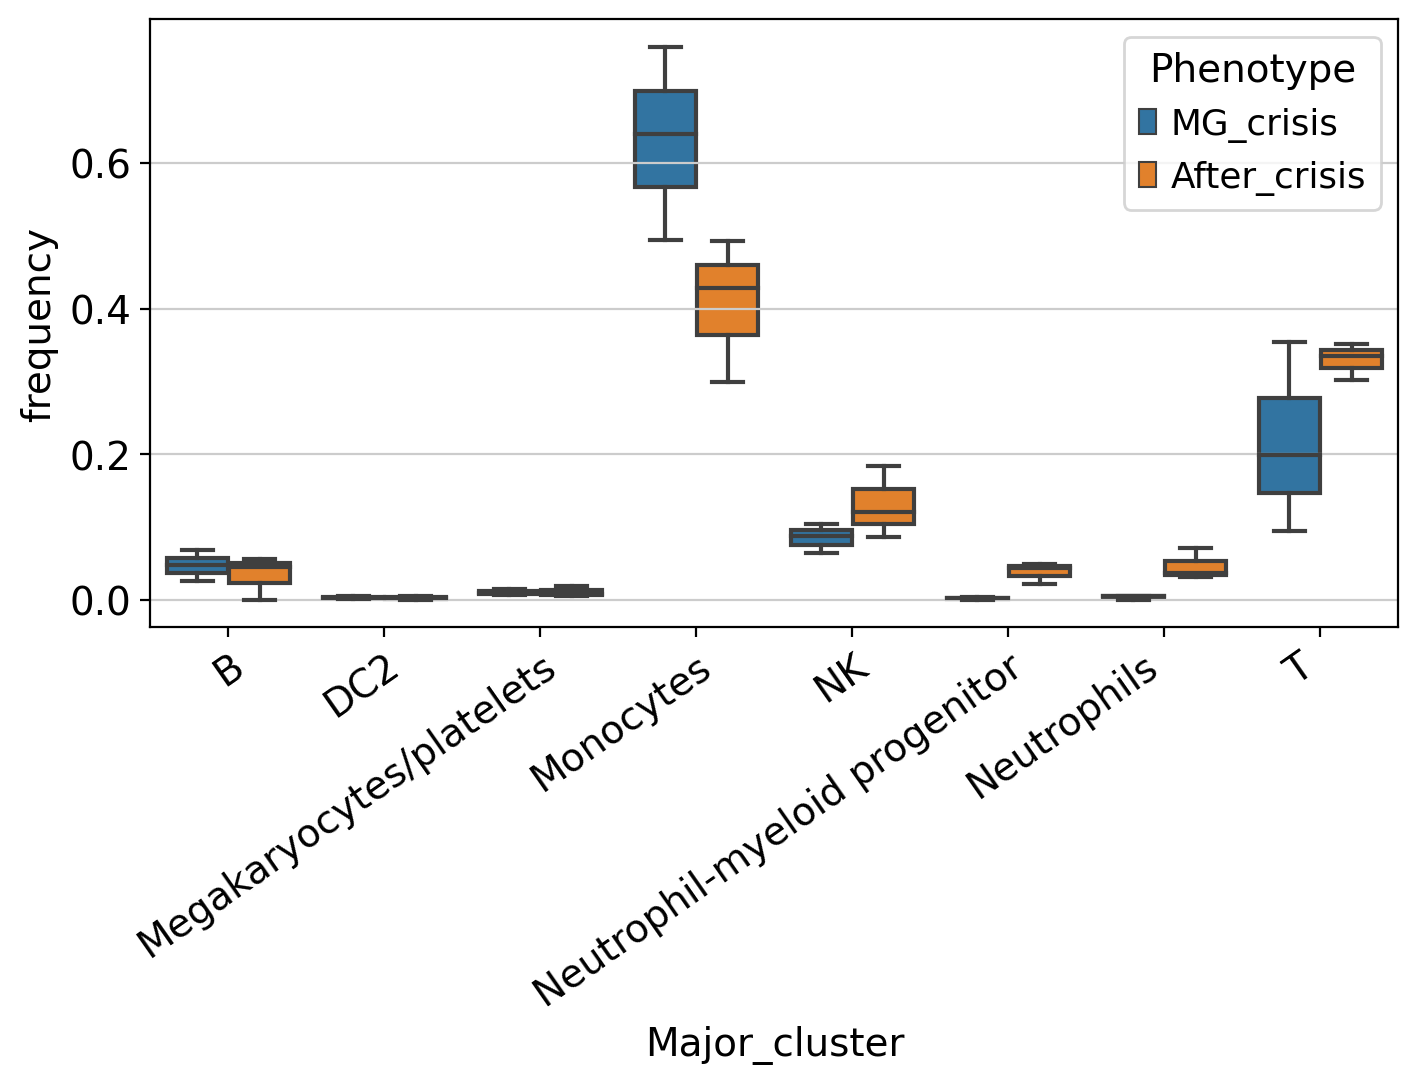

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

ax = sns.boxplot(data = cell_type_counts, x = 'Major_cluster', y = 'frequency', hue = 'Phenotype', hue_order= ['MG_crisis', 'After_crisis'])

plt.show()
#plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')

# DEG (MC vs. After MC)

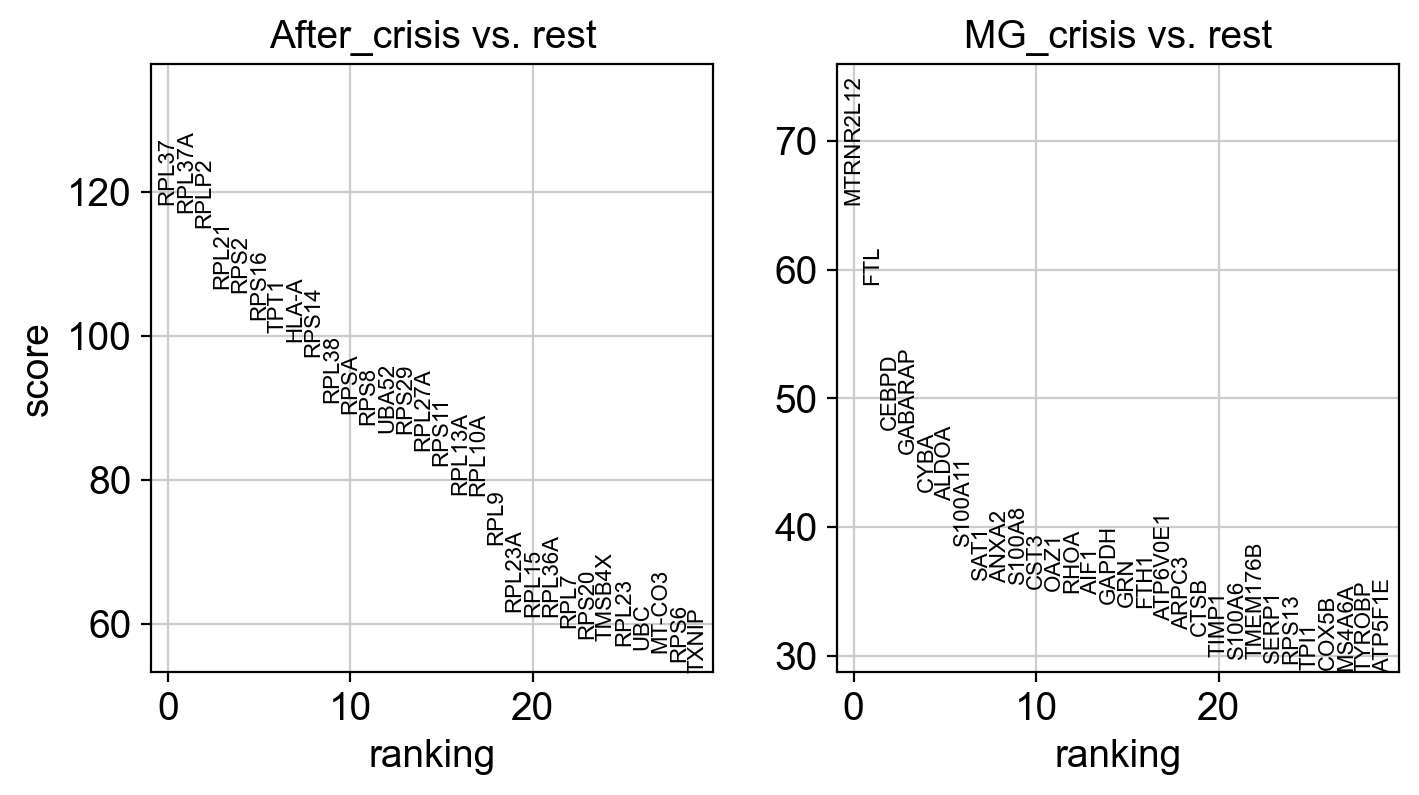

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


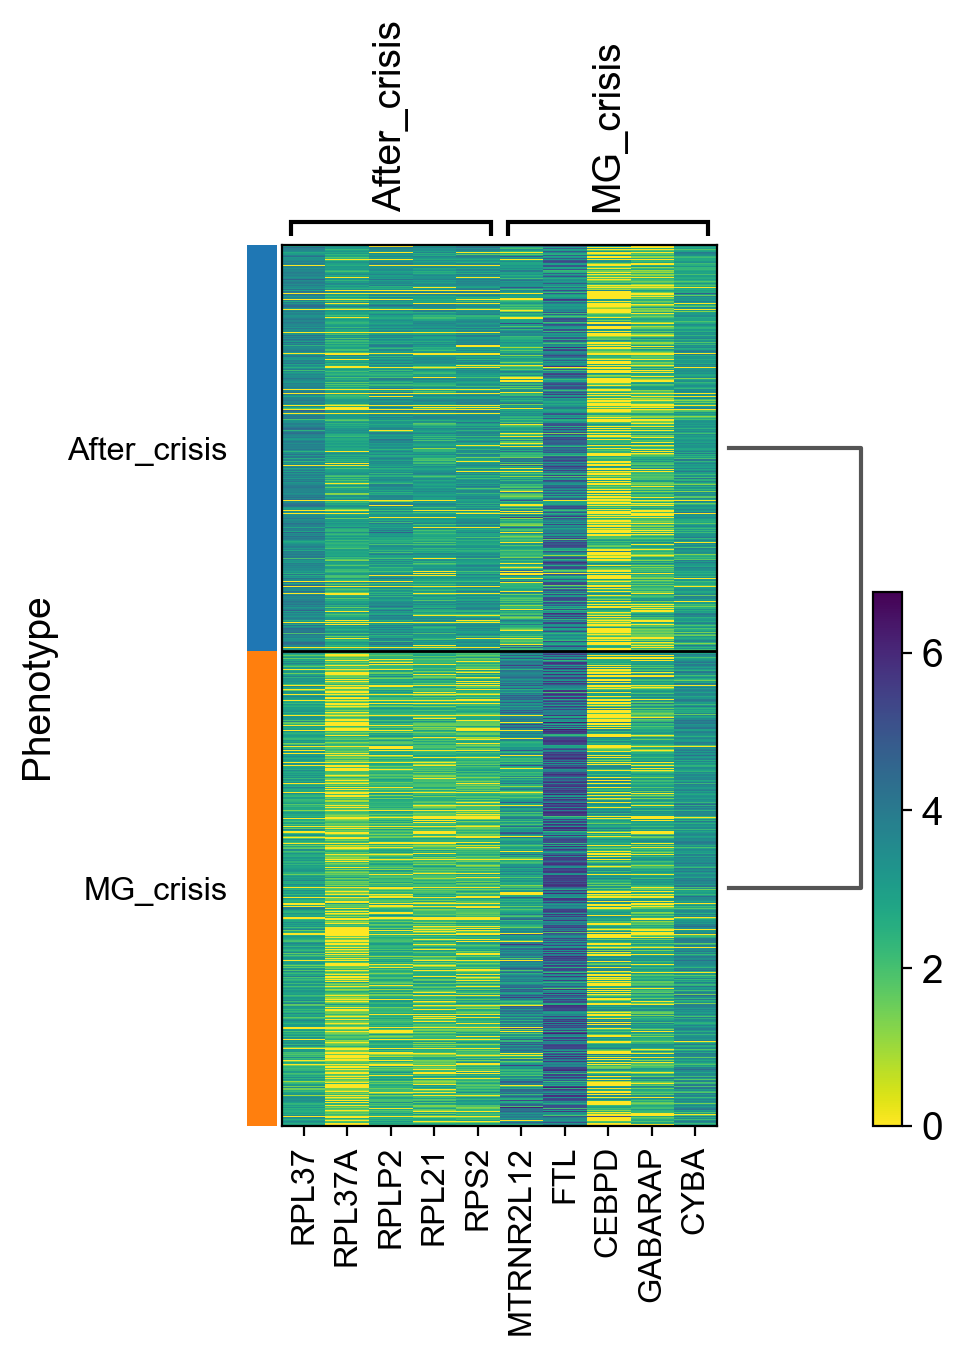

In [7]:
sc.tl.rank_genes_groups(adata_MC, 'Phenotype', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_MC, n_genes=30, sharey=False, key="wilcoxon")

sc.pl.rank_genes_groups_heatmap(adata_MC, n_genes=5, key="wilcoxon", groupby="Phenotype", show_gene_labels=True)

In [10]:
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC, group='MG_crisis', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals < 0.05) & (abs(Crisis_genes.logfoldchanges) > 1)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)
#Crisis_genes[['names']]#.to_csv('ALL_DEG_Crisis.tsv', index=False)
#Crisis_genes.to_csv('T_DEG_Crisis (p0.05).csv', index=False)
Crisis_genes

,names,scores,logfoldchanges,pvals,pvals_adj
0,IGLV3-27,7.168928,6.898869,7.558735e-13,1.012137e-11
1,C1QC,6.436542,4.727952,1.222262e-10,1.421015e-09
2,KCNMA1,2.665949,4.631129,7.677140e-03,3.559649e-02
3,IGKV1-6,2.298023,4.234140,2.156045e-02,8.922038e-02
4,C1QA,9.714663,4.229242,2.611121e-22,5.367457e-21
...,...,...,...,...,...
342,LTF,-13.485044,-3.793994,1.915498e-41,6.724840e-40
343,BPI,-9.268852,-3.821175,1.881600e-20,3.589148e-19
344,DEFA3,-19.538389,-3.854563,5.179076e-85,4.010202e-83
345,CRISP3,-3.180504,-4.036878,1.470189e-03,7.912365e-03


In [19]:
genes =Crisis_genes.iloc[:25,]['names'].tolist() 
df = sc.get.obs_df(adata_MC, genes + ["Major_cluster",'Phenotype'], use_raw=False)
df2 = df.melt(id_vars=["Major_cluster",'Phenotype'], value_vars=genes)
df2

,Major_cluster,Phenotype,variable,value
0,Monocytes,MG_crisis,IGLV3-27,0.000000
1,Monocytes,MG_crisis,IGLV3-27,0.000000
2,Monocytes,MG_crisis,IGLV3-27,1.135101
3,NK cells,MG_crisis,IGLV3-27,0.000000
4,Monocytes,MG_crisis,IGLV3-27,0.000000
...,...,...,...,...
839420,NK cells,After_crisis,MS4A4A,0.000000
839421,Megakaryocytes,After_crisis,MS4A4A,0.000000
839422,Monocytes,After_crisis,MS4A4A,0.000000
839423,Monocytes,After_crisis,MS4A4A,0.000000


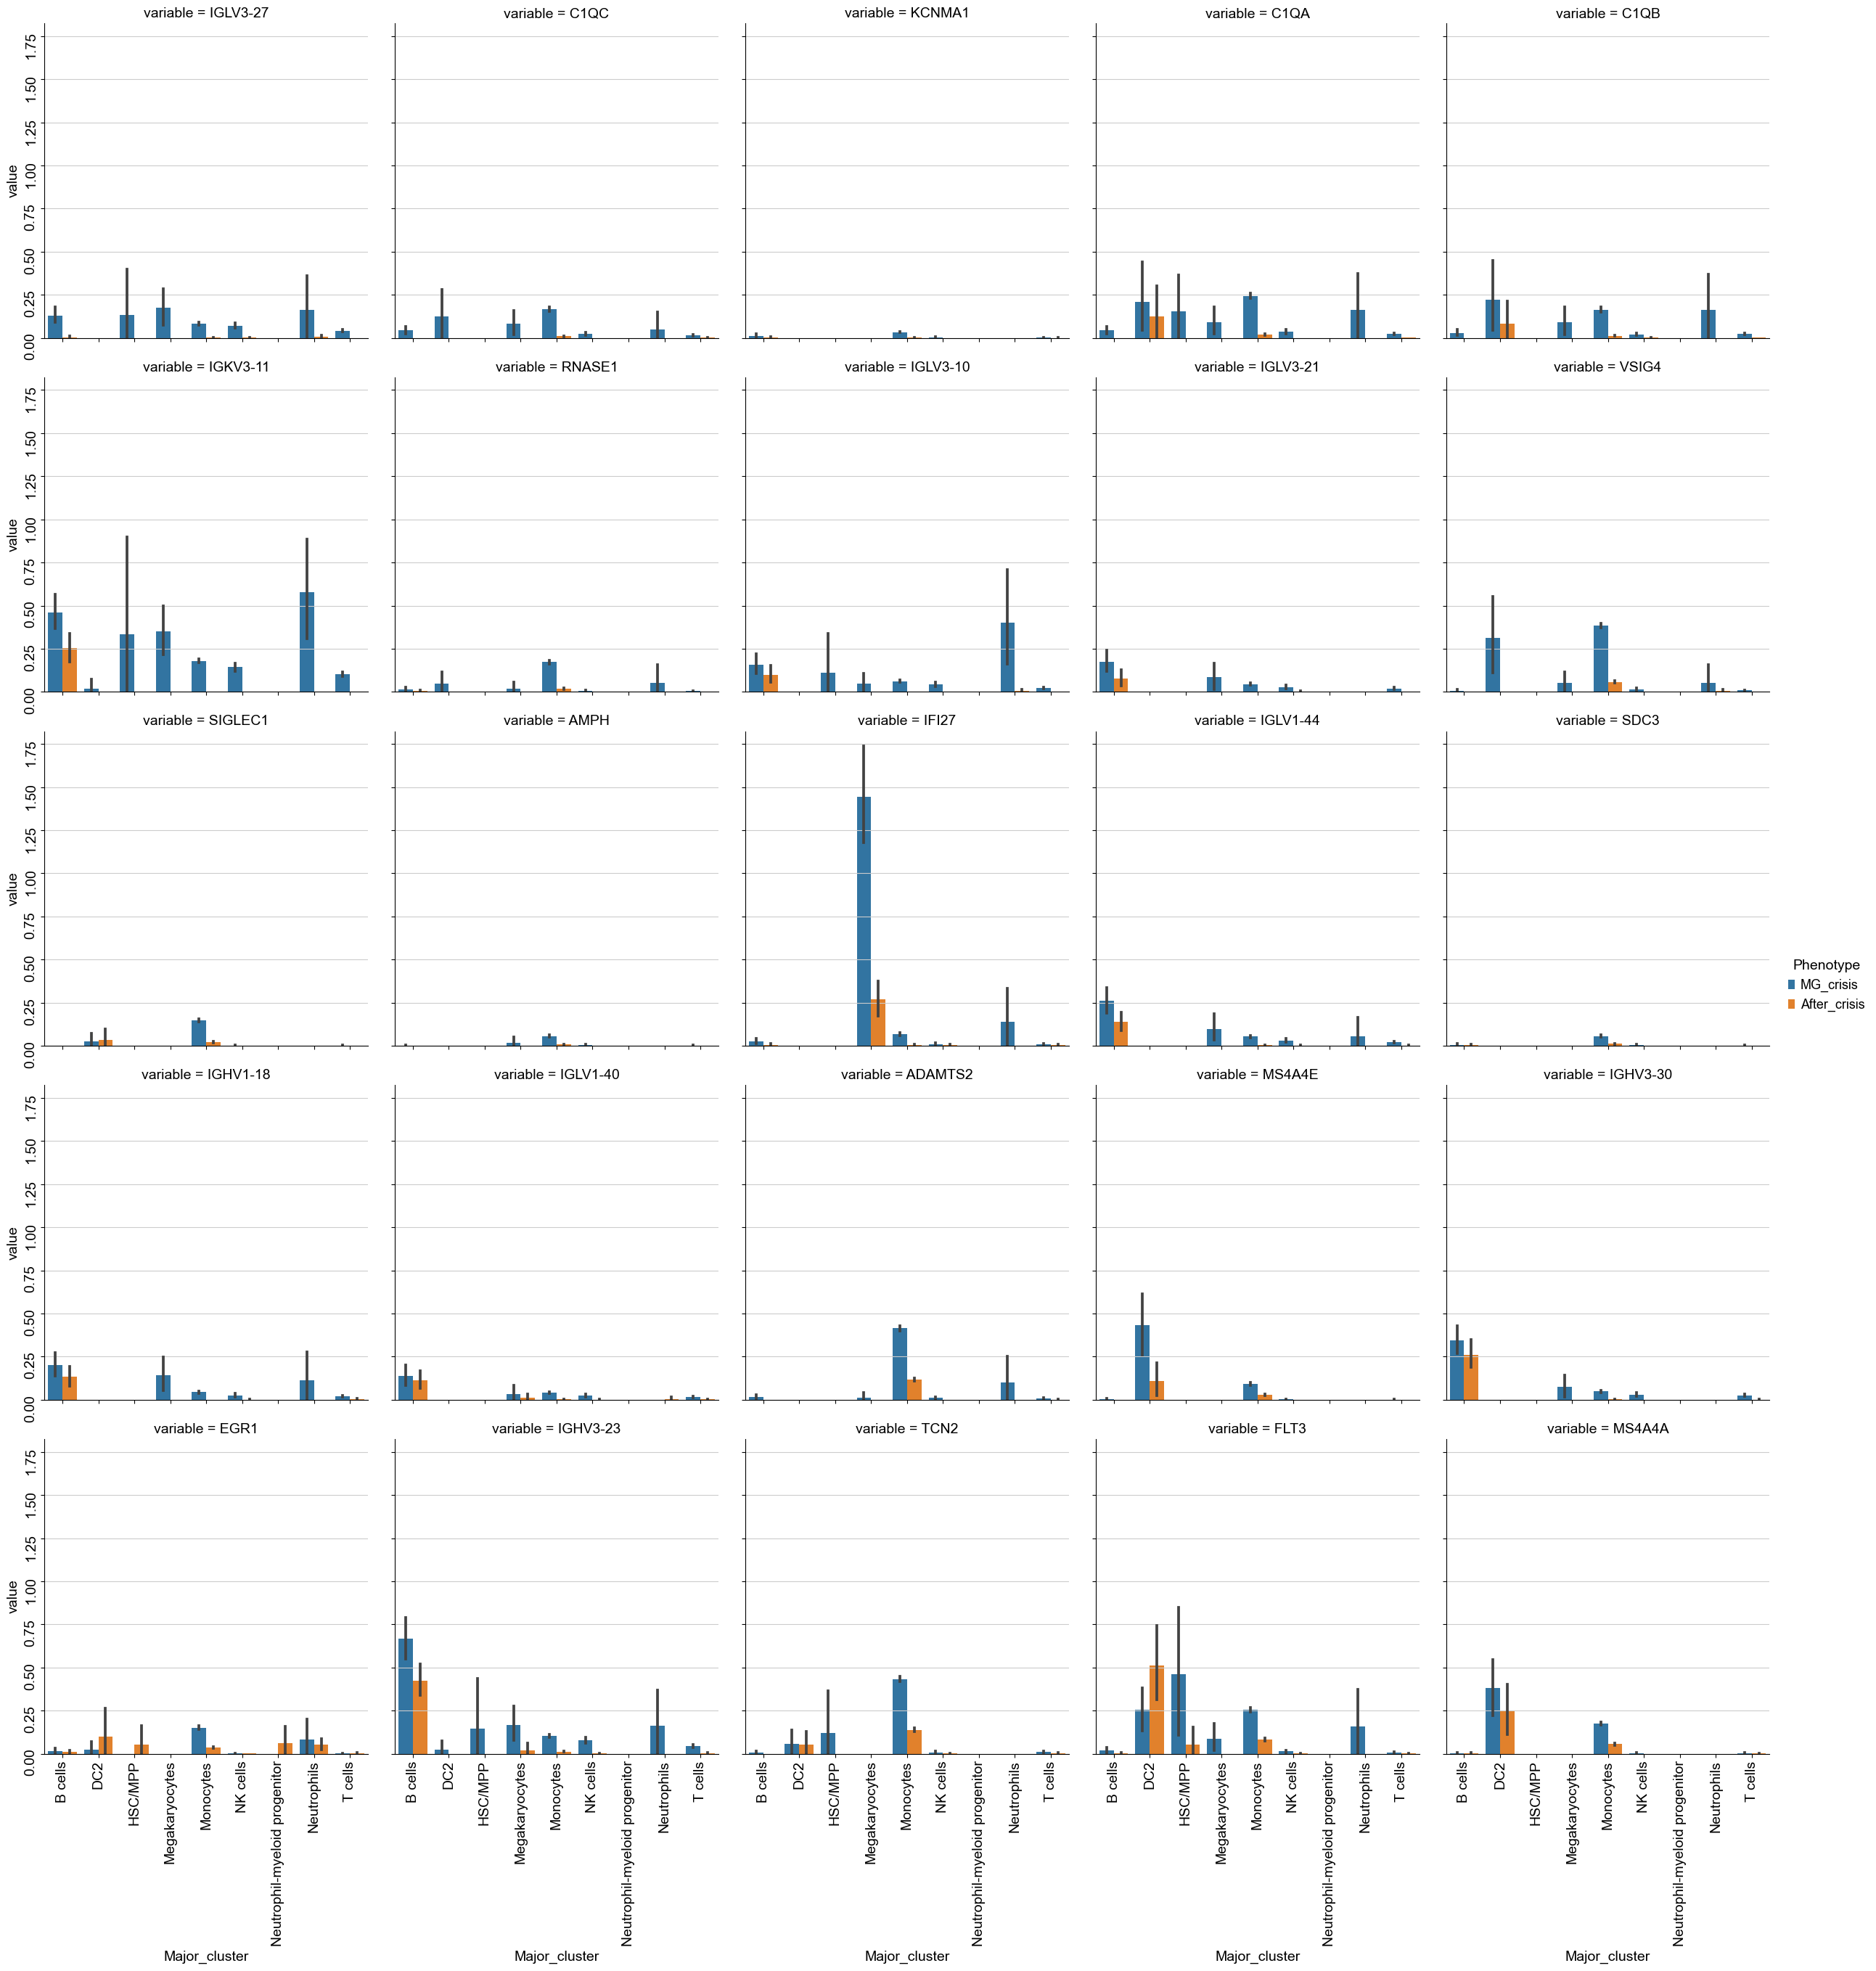

In [20]:
sc.set_figure_params(dpi=50, color_map = 'viridis_r', transparent=False, frameon=False)

ax = sns.catplot(x = "Major_cluster", y = "value", hue = "Phenotype", kind = 'bar',  hue_order= ['MG_crisis', 'After_crisis'],
               col = "variable", data = df2, col_wrap=5)

#plt.xticks(rotation=90)
ax.tick_params(labelrotation=90)

In [18]:
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC, group='MG_crisis', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (abs(Crisis_genes.logfoldchanges) > .5)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)
Crisis_top20 = Crisis_genes.iloc[:20,].names.tolist()
Crisis_down20 = Crisis_genes.iloc[-20:,].names.tolist()

Crisis_20_divert = Crisis_top20 + Crisis_down20
Crisis_20_divert

['IGLV3-27',
 'C1QC',
 'KCNMA1',
 'C1QA',
 'C1QB',
 'IGKV3-11',
 'RNASE1',
 'IGLV3-10',
 'IGLV3-21',
 'VSIG4',
 'SIGLEC1',
 'AMPH',
 'IFI27',
 'IGLV1-44',
 'SDC3',
 'IGHV1-18',
 'IGLV1-40',
 'ADAMTS2',
 'MS4A4E',
 'IGHV3-30',
 'MMP8',
 'PGLYRP1',
 'JUN',
 'CAMP',
 'CEACAM1',
 'AZU1',
 'S100P',
 'AC245014.3',
 'LCN2',
 'TCN1',
 'DEFA4',
 'PRTN3',
 'ABCA13',
 'MS4A3',
 'OLFM4',
 'LTF',
 'BPI',
 'DEFA3',
 'CRISP3',
 'CEACAM8']

In [3]:
sc.tl.rank_genes_groups(adata_MC, 'Phenotype', method='wilcoxon', key_added = "wilcoxon")
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC, group='MG_crisis', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (abs(Crisis_genes.logfoldchanges) > 0.5)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)

Crisis_genes_up = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges > 0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)
Crisis_genes_down = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges < -0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)

glist_up = Crisis_genes_up['names'].squeeze().str.strip().tolist()
glist_down = Crisis_genes_down['names'].squeeze().str.strip().tolist()
glist_all = glist_up + glist_down

print(f'glist_up: {len(glist_up)}, glist_down: {len(glist_down)}, glist_all: {len(glist_all)}')

Crisis_genes.to_csv('./write/All_DEG_MC_vs_AC.csv', index=False)

glist_up: 440, glist_down: 903, glist_all: 1343


## Top DEG genes

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()
meta NOT subset; don't know how to subset; dropped


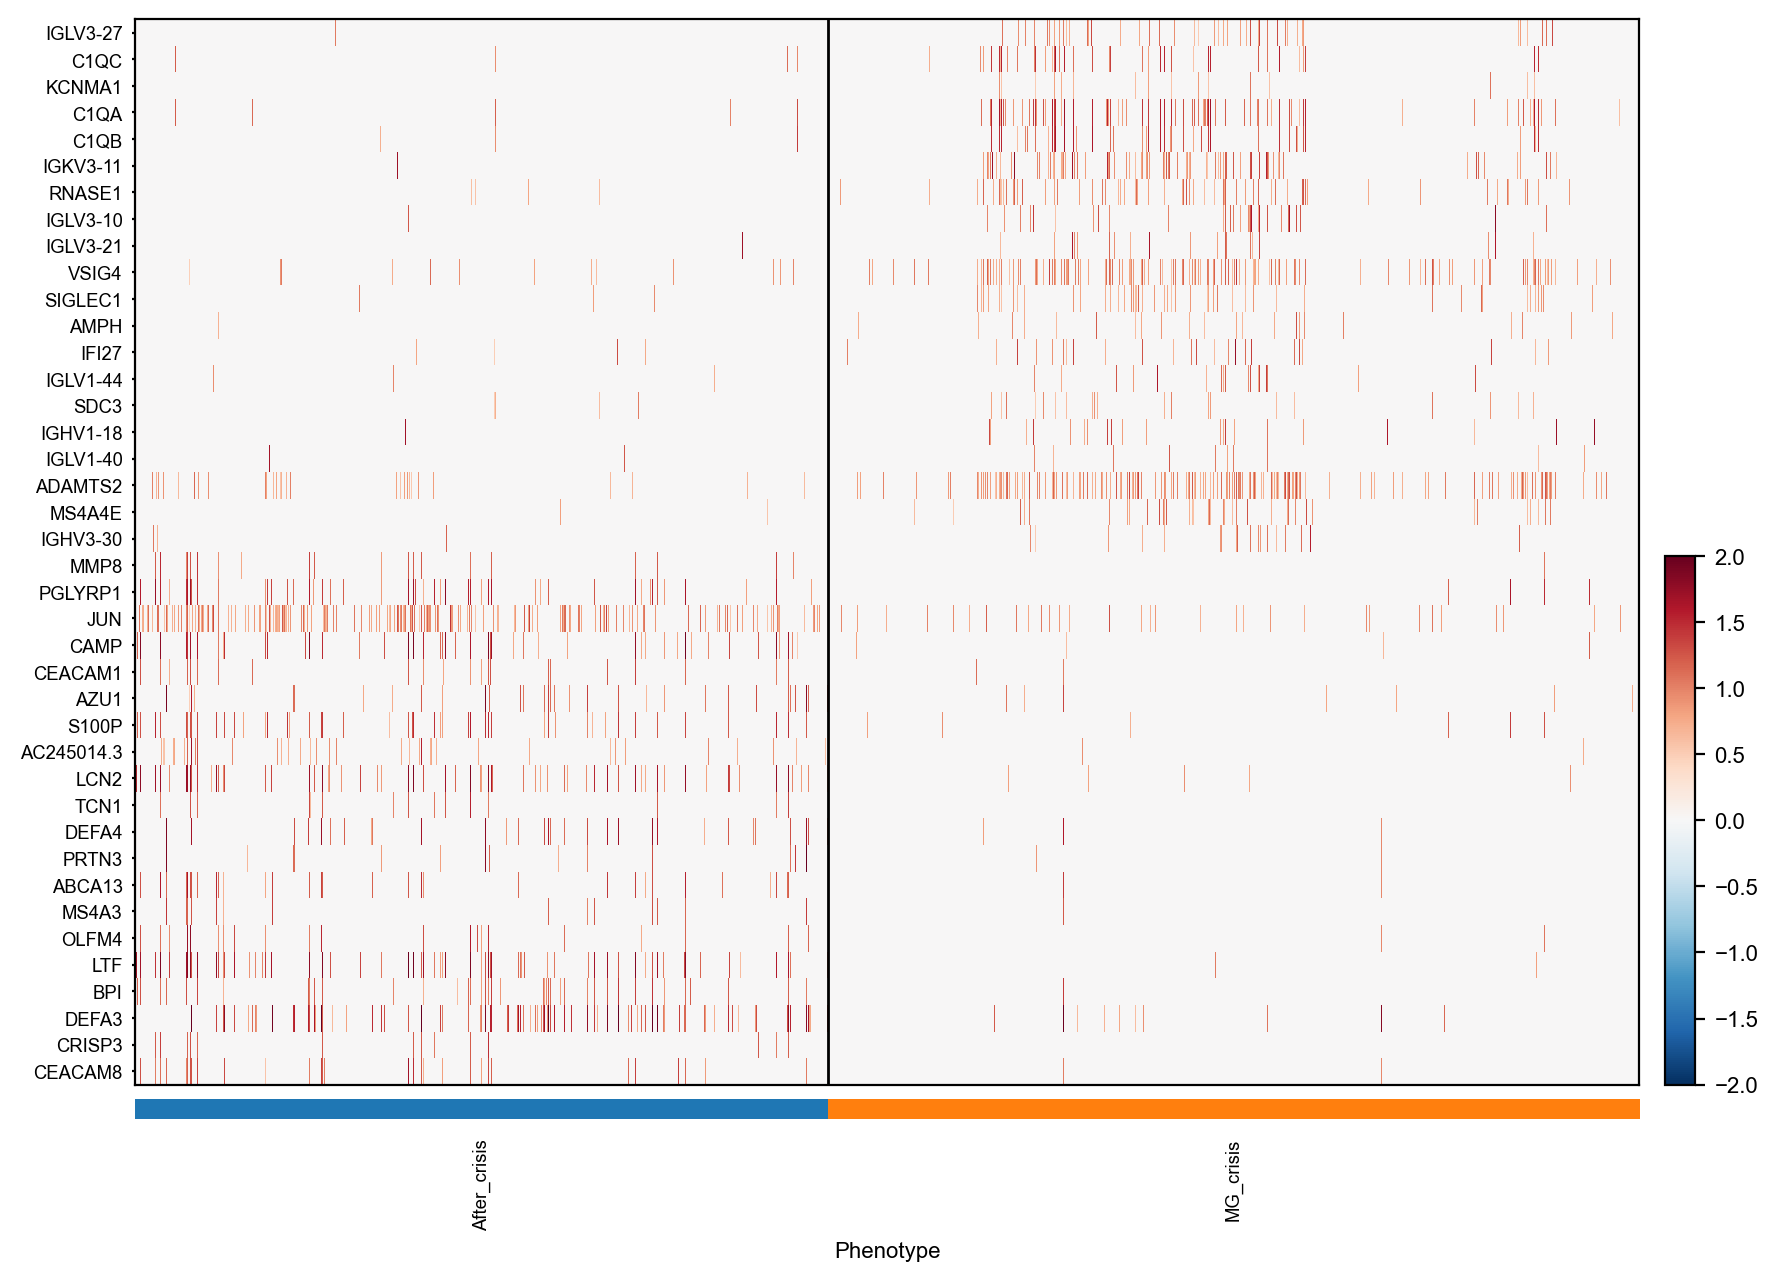

In [19]:
sc.set_figure_params(dpi=100, transparent=True, frameon=False, fontsize=8, figsize= [2, 1])

sc.pl.heatmap(adata_MC, Crisis_20_divert, groupby='Phenotype', swap_axes=True, log=True, vmin=-2, vmax=2,  cmap='RdBu_r' , save='DEG divergent top genes plot') #  vmin=-2, vmax=2, cmap='RdBu_r' 'viridis'

In [8]:
import gseapy as gp

#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gp.get_library_name(organism='Human')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease

In [9]:
# MC gene set
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC, group='MG_crisis', key='wilcoxon')
Crisis_genes_up = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges > 0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)
Crisis_genes_down = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges < -0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)

glist_up = Crisis_genes_up['names'].squeeze().str.strip().tolist()
glist_down = Crisis_genes_down['names'].squeeze().str.strip().tolist()
glist_all = glist_up + glist_down

print(f'glist_up: {len(glist_up)}, glist_down: {len(glist_down)}, glist_all: {len(glist_all)}')

glist_up: 440, glist_down: 903, glist_all: 1343


## MC up-regulated pathyways 
- GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


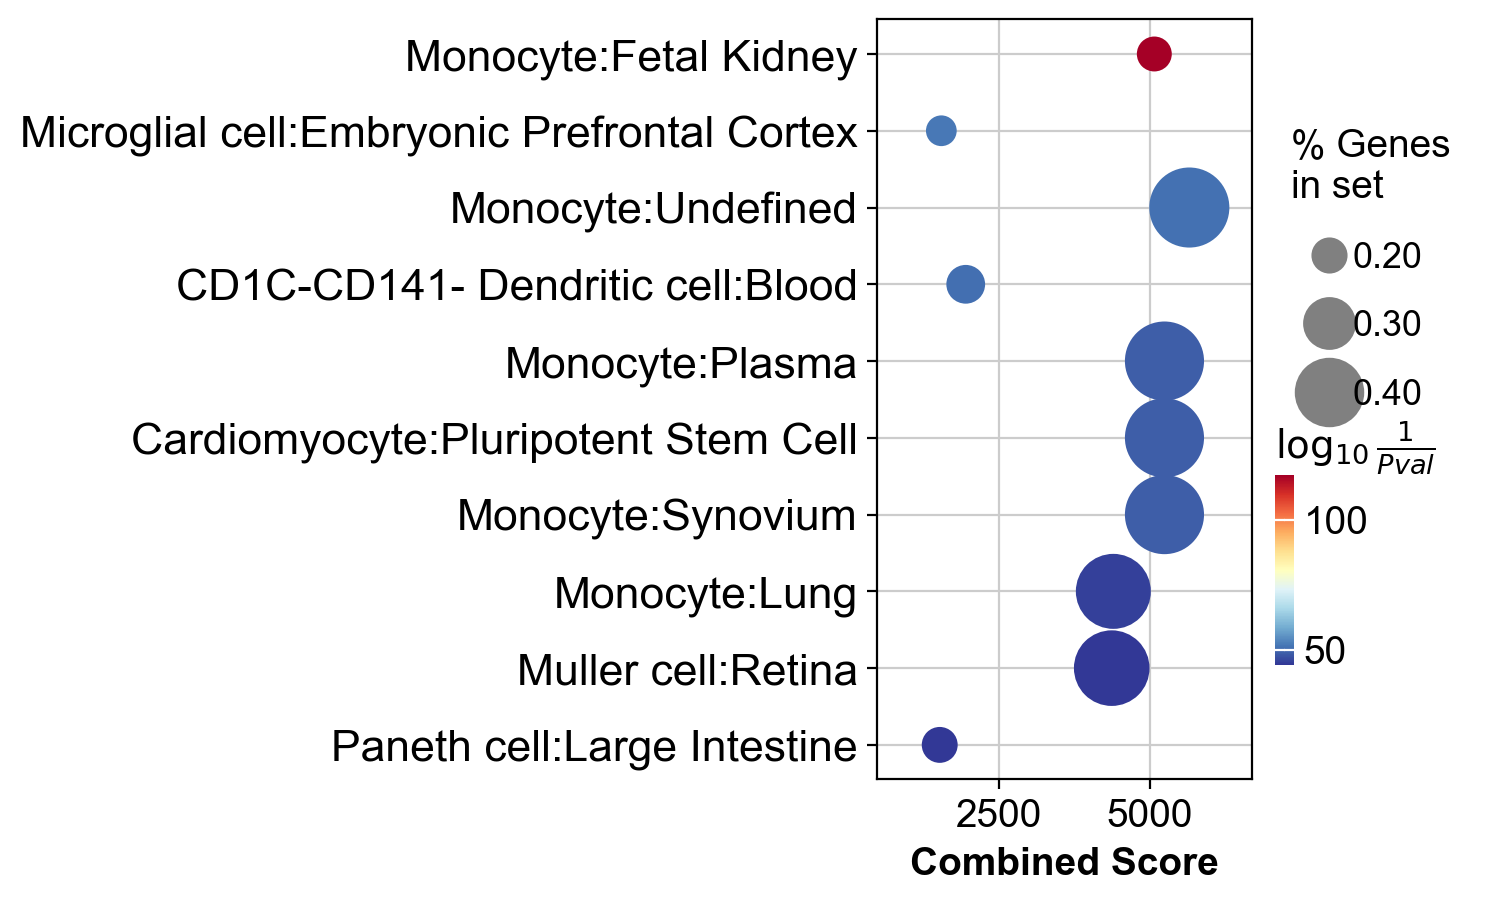

In [10]:
enr_res = gp.enrichr(gene_list=glist_up,
                     organism='Human',
                     gene_sets='CellMarker_Augmented_2021',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_up CellMarker.pdf')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


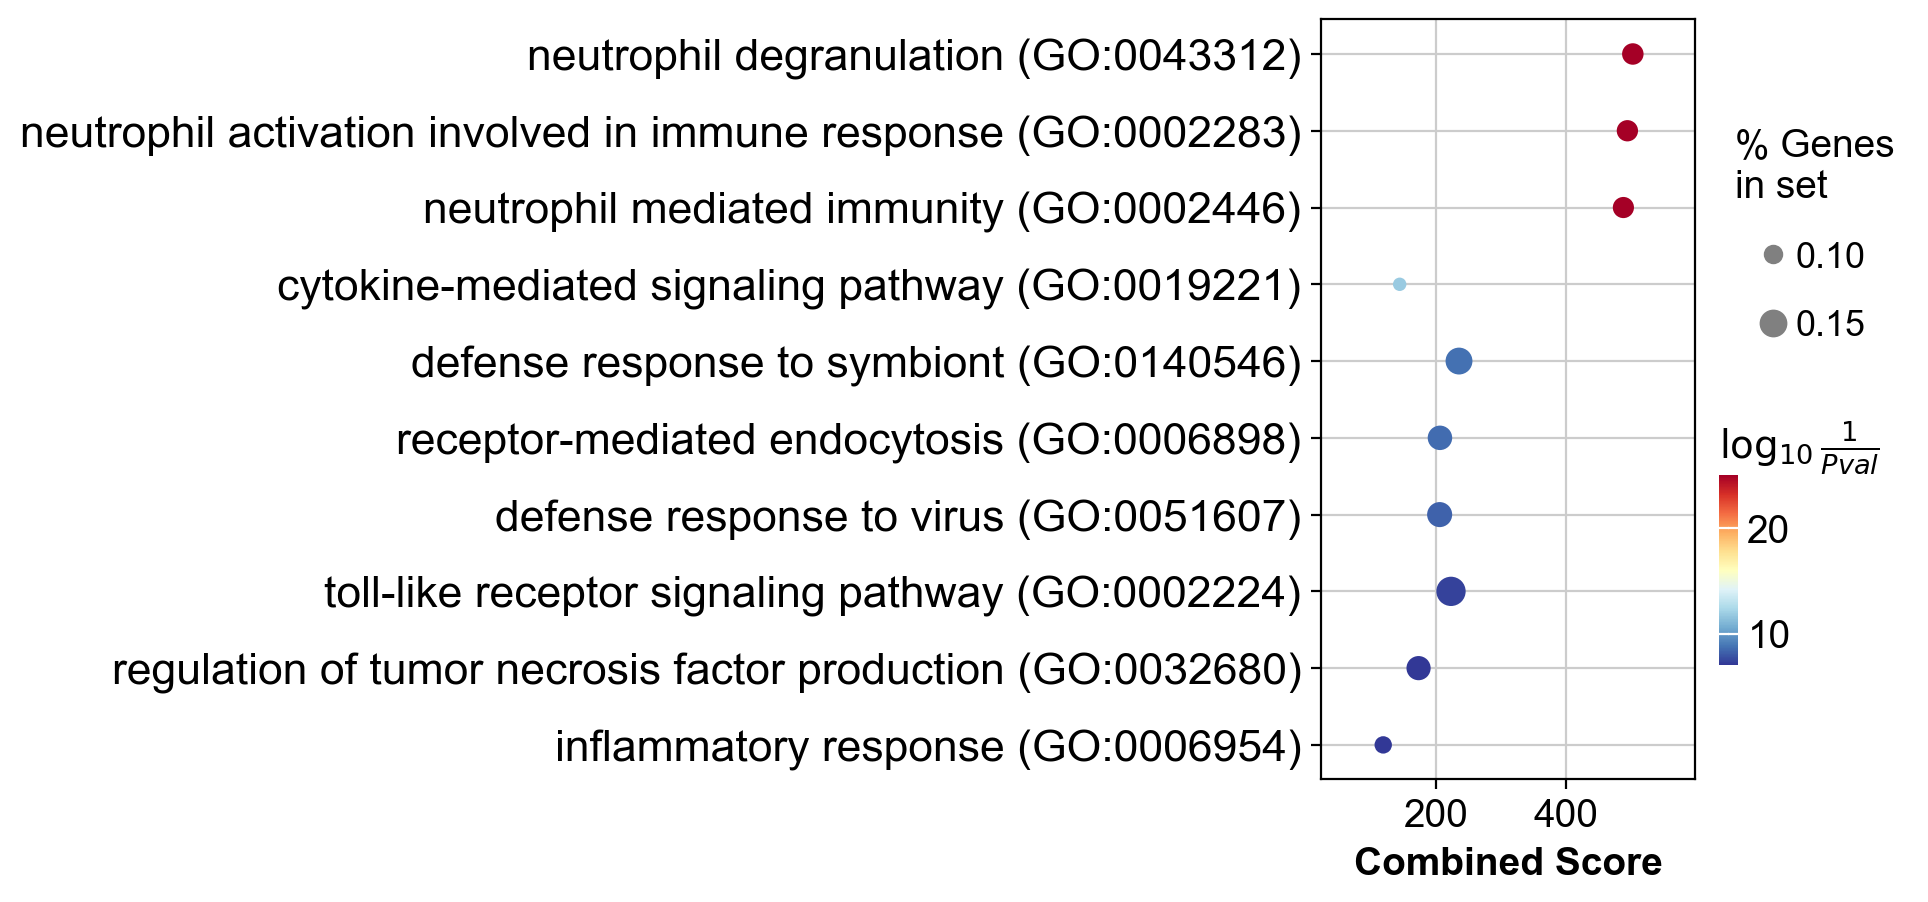

In [11]:
enr_res = gp.enrichr(gene_list=glist_up,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2021',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_up GO_Biological.pdf')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


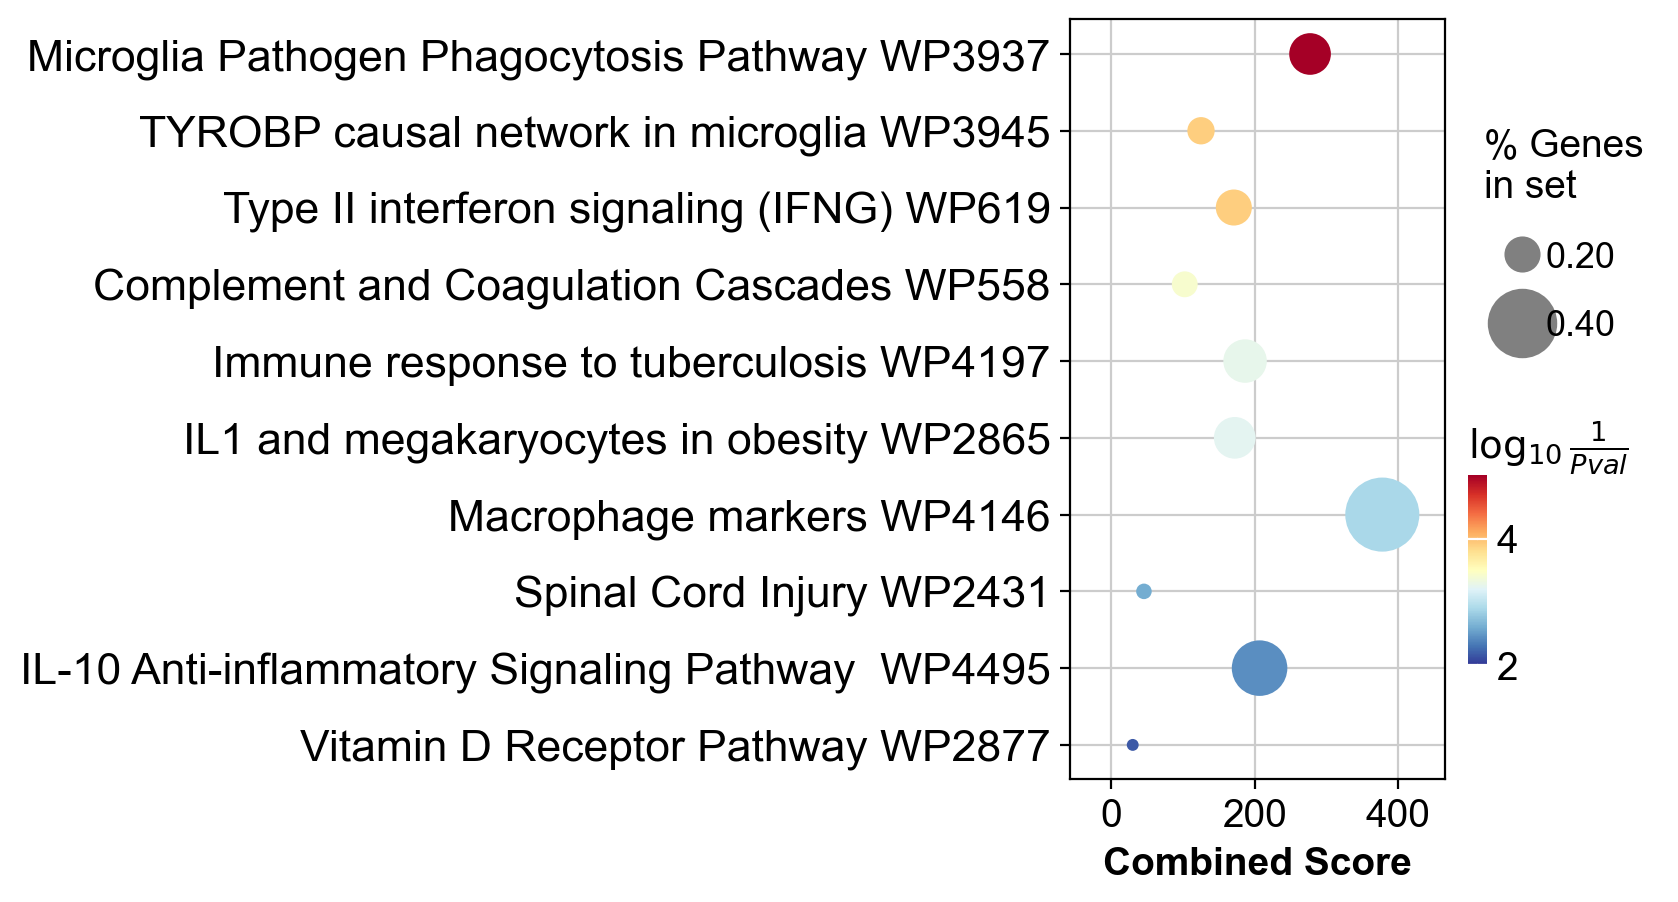

In [15]:
enr_res = gp.enrichr(gene_list=glist_up,
                     organism='Human',
                     gene_sets='WikiPathway_2021_Human',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_up WikiPathway.pdf')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


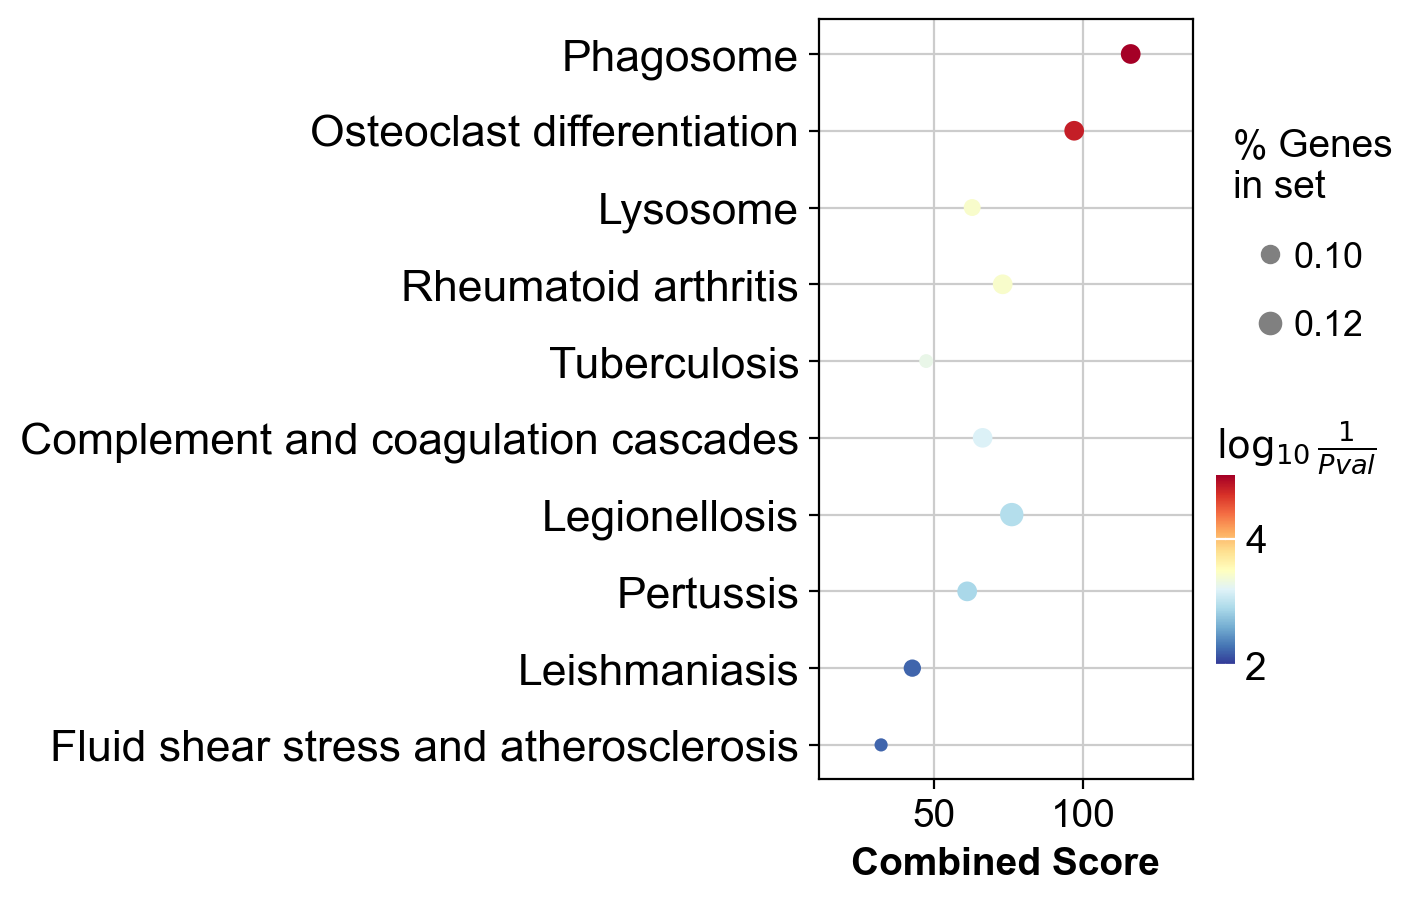

In [16]:
enr_res = gp.enrichr(gene_list=glist_up,
                     organism='Human',
                     gene_sets='KEGG_2021_Human',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_up KEGG.pdf')

## MC down-regulated pathyways 
- GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


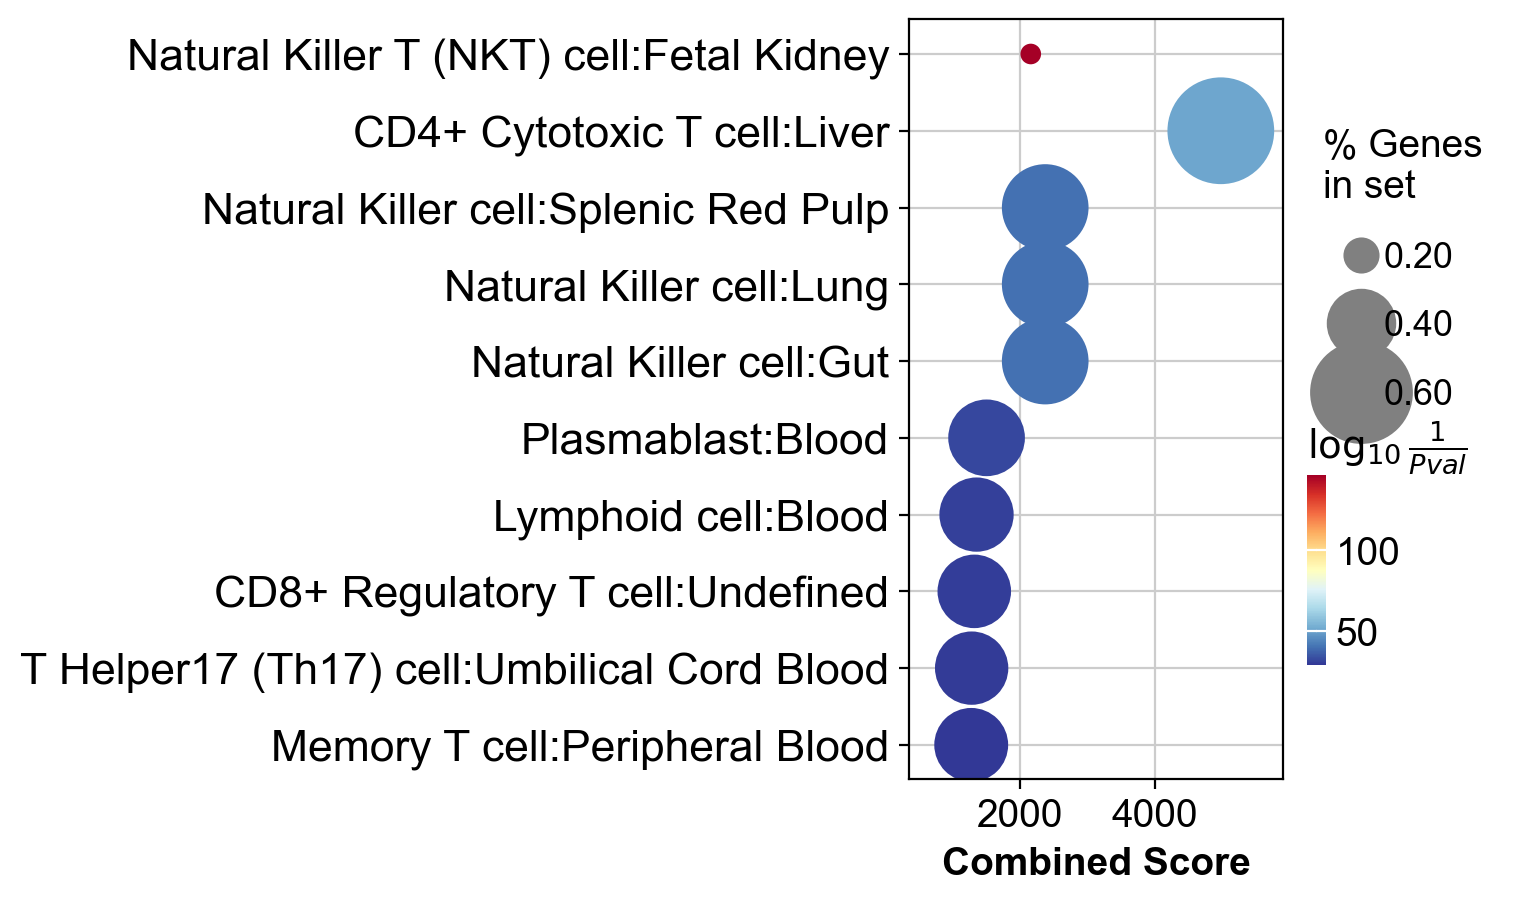

In [12]:
enr_res = gp.enrichr(gene_list=glist_down,
                     organism='Human',
                     gene_sets='CellMarker_Augmented_2021',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_down CellMarker.pdf')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


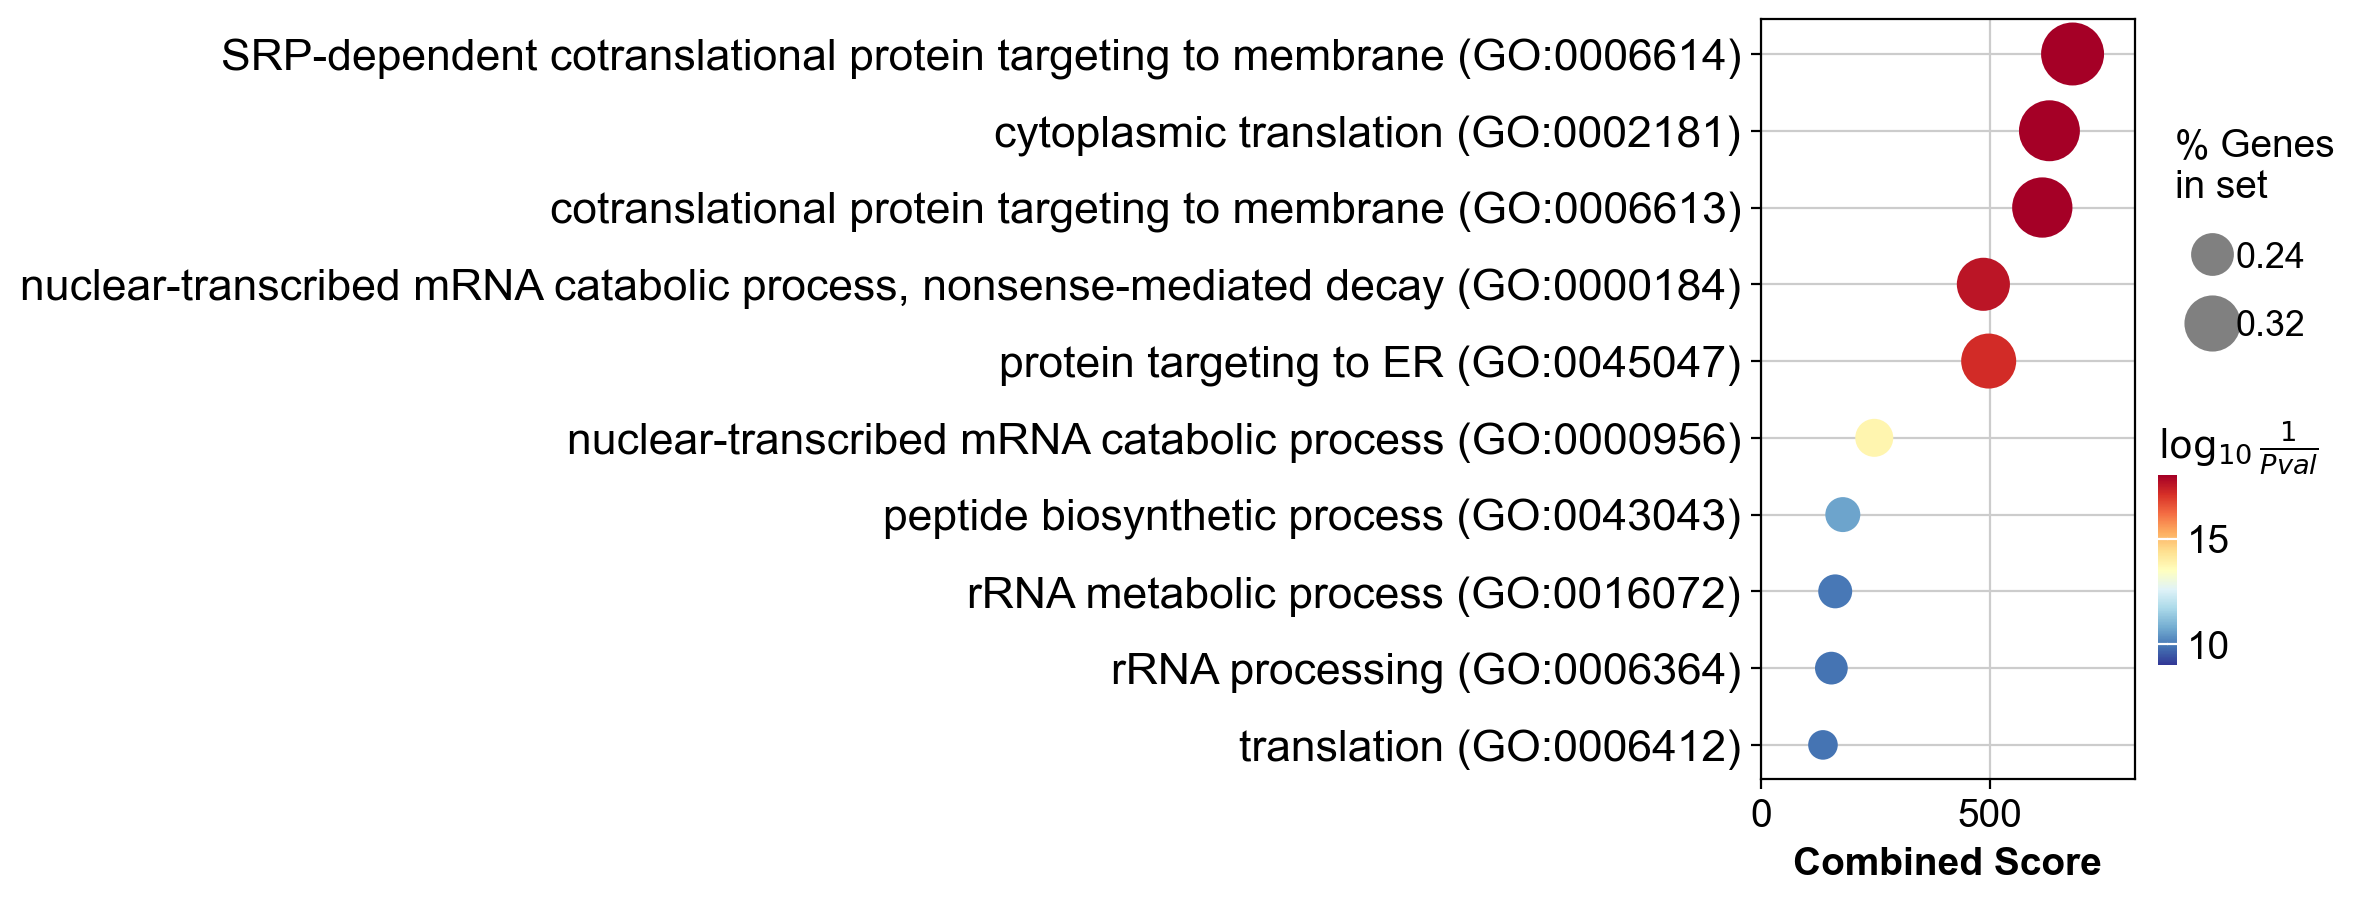

In [13]:
enr_res = gp.enrichr(gene_list=glist_down,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2021',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_down Biological_Process.pdf')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


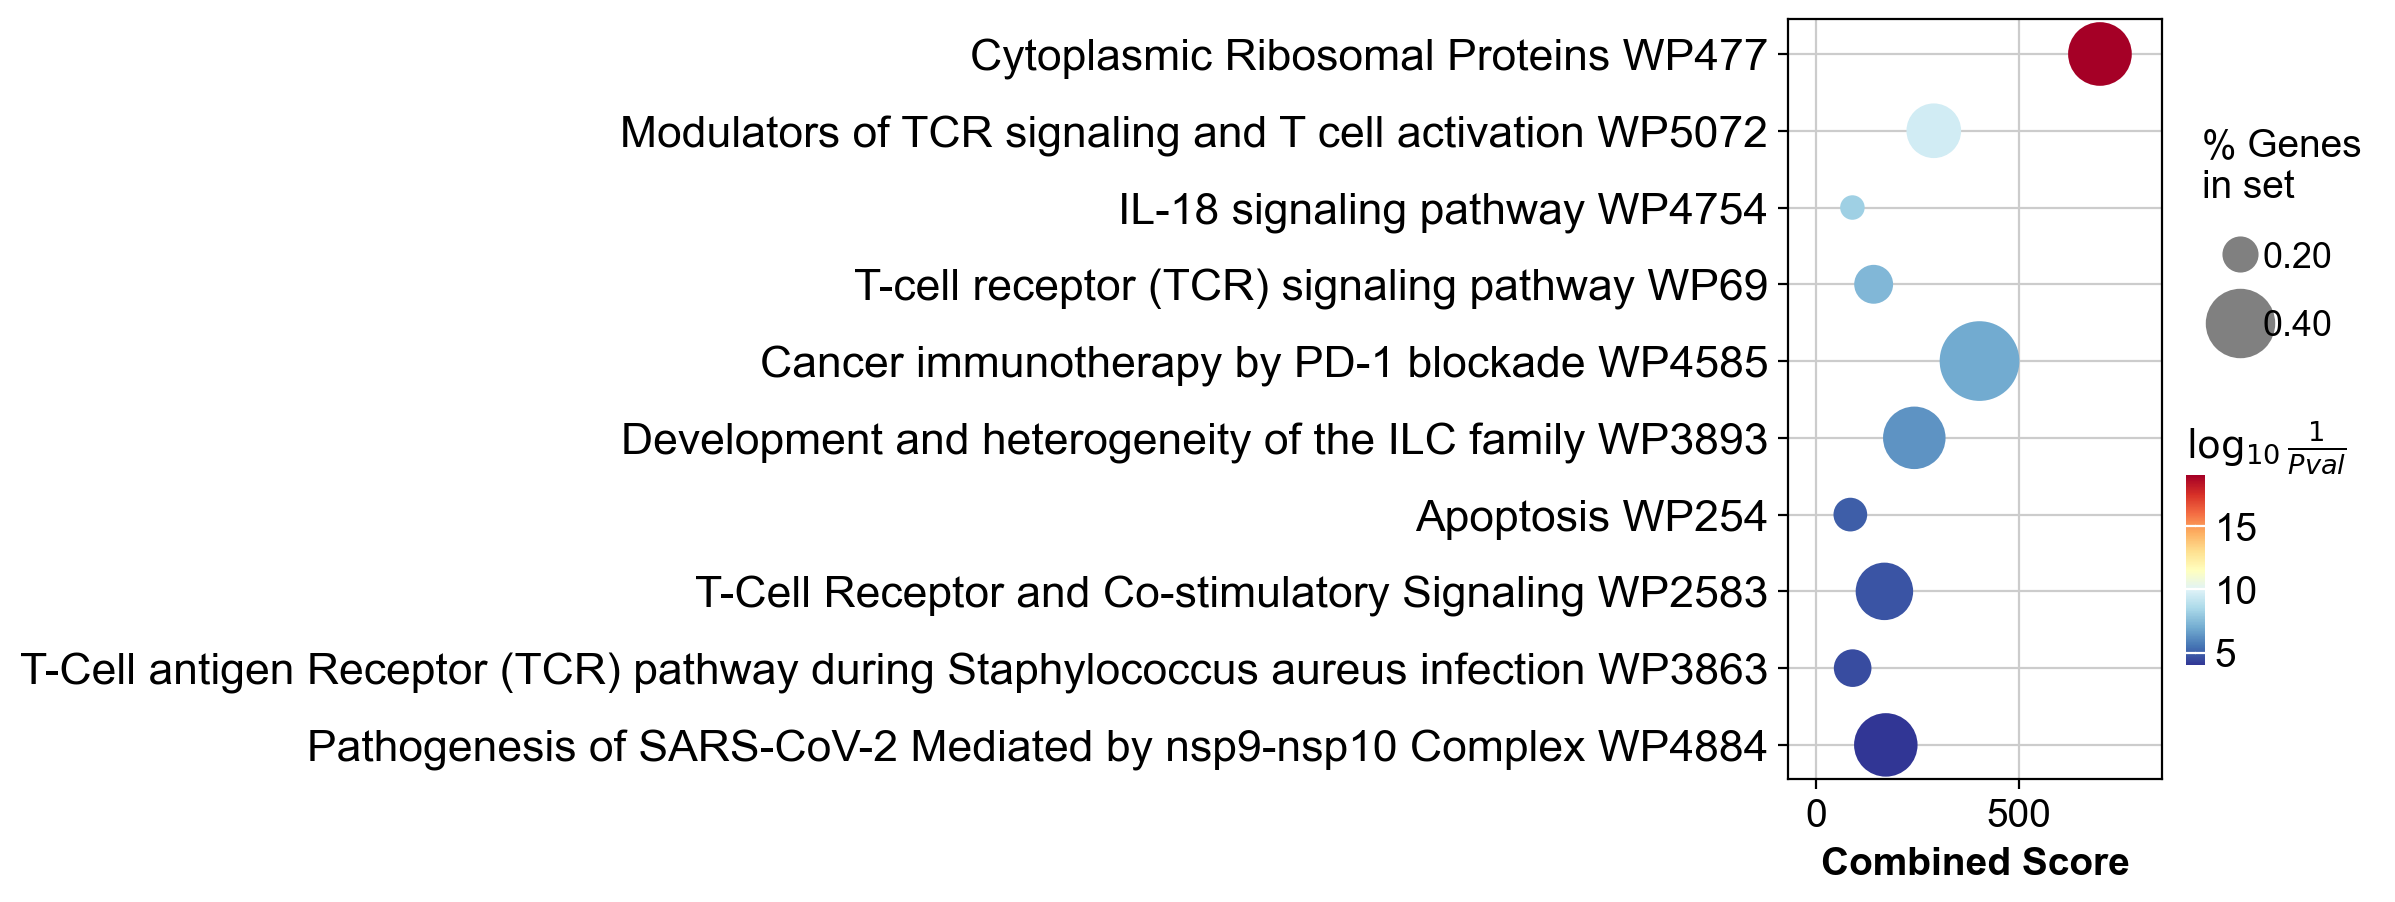

In [14]:
enr_res = gp.enrichr(gene_list=glist_down,
                     organism='Human',
                     gene_sets='WikiPathway_2021_Human',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_down WikiPathway.pdf')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


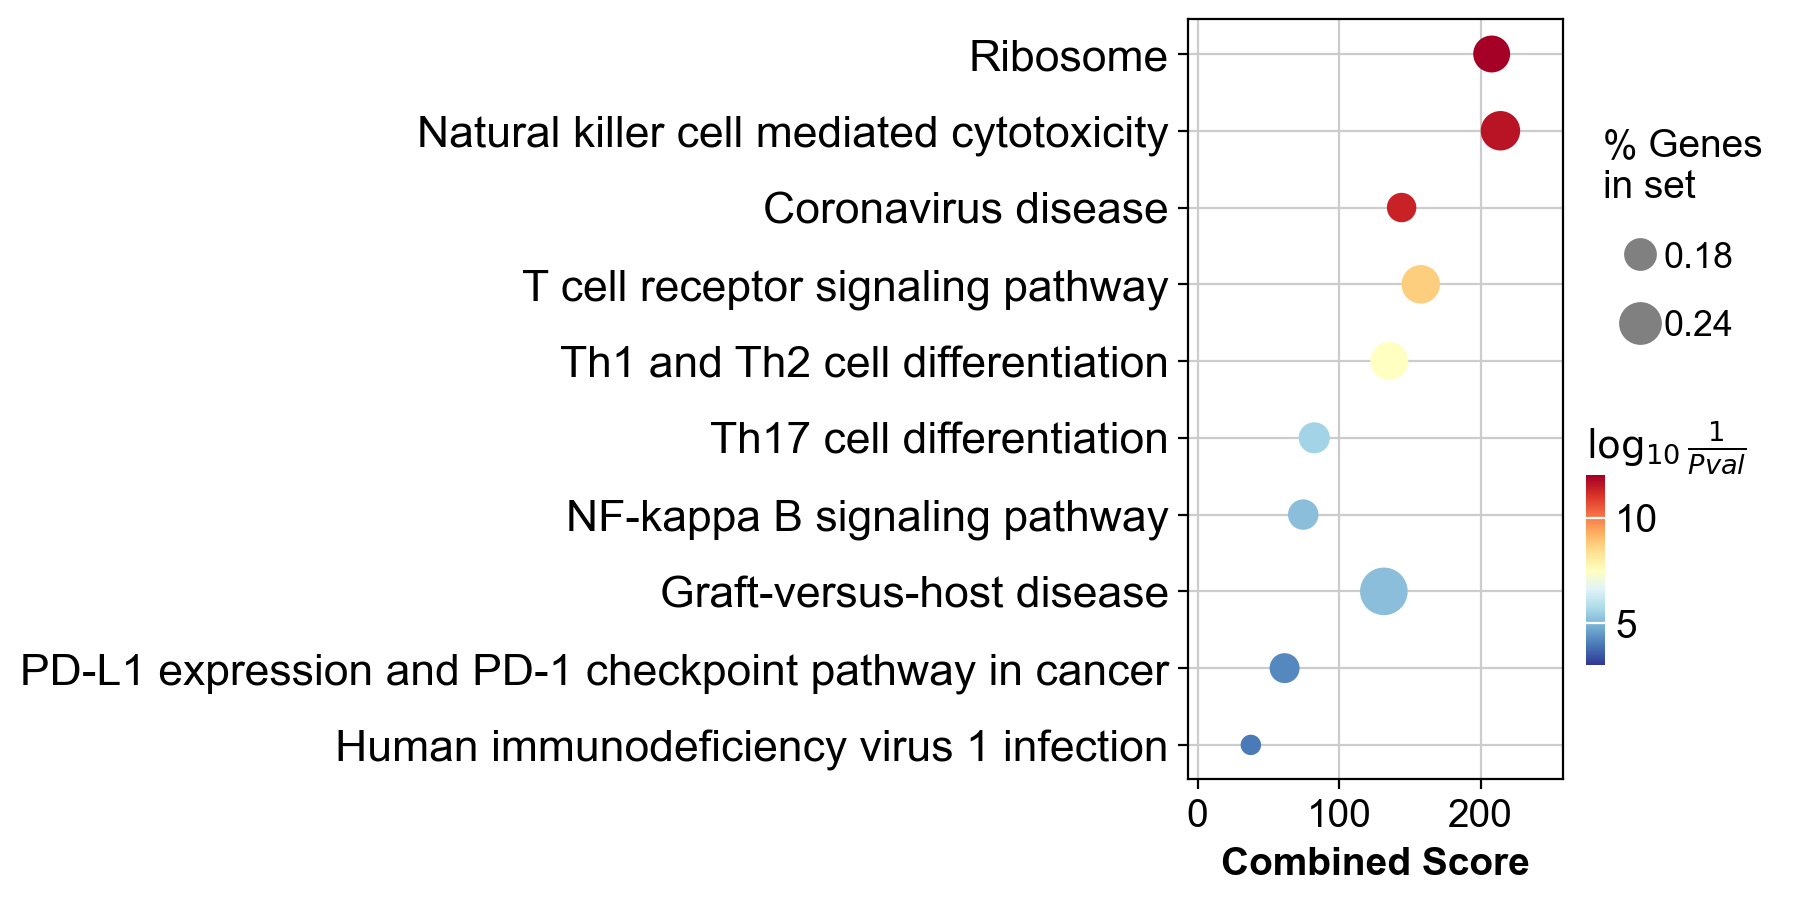

In [17]:
enr_res = gp.enrichr(gene_list=glist_down,
                     organism='Human',
                     gene_sets='KEGG_2021_Human',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_down KEGG.pdf')